# Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be provided with Automobile insurance claim dataset.

One has to predict the claim amount in the Automobile insurance dataset.



https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/Auto_Insurance_claims_amount.csv



And 



One has to predict the insurance fraud  in the Automobile insurance dataset.



https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/Automobile_insurance_fraud.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ClaimsAmount=pd.read_csv('Auto_Insurance_Claims_amount.csv')
fraud=pd.read_csv('Automobile_insurance_fraud.csv')

 Predict the claim amount in the Automobile insurance dataset

In [3]:
ClaimsAmount.head(25)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,US,IA,Iowa,825.629780,Yes,Basic,Bachelor,1/25/11,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,US,IA,Iowa,538.089864,Yes,Basic,College,2/24/11,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,US,NE,Nebraska,721.610031,No,Premium,Master,1/18/11,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,US,IA,Iowa,2412.750402,Yes,Basic,Bachelor,1/26/11,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,US,IA,Iowa,738.817808,No,Extended,College,2/17/11,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


In [4]:
ClaimsAmount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [5]:
ClaimsAmount.columns.to_series().groupby(ClaimsAmount.dtypes).groups

{dtype('int64'): Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies'],
       dtype='object'),
 dtype('float64'): Index(['Claim Amount', 'Total Claim Amount'], dtype='object'),
 dtype('O'): Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
        'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type', 'Policy',
        'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
       dtype='object')}

In [6]:
ClaimsAmount.shape

(9134, 26)

In [7]:
ClaimsAmount.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
#checking for missing values in data
ClaimsAmount.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
ClaimsAmount['Customer'].duplicated().sum()

0

In [10]:
ClaimsAmount['Country'].value_counts()

US    9134
Name: Country, dtype: int64

In [11]:
ClaimsAmount['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [12]:
ClaimsAmount['State'].value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

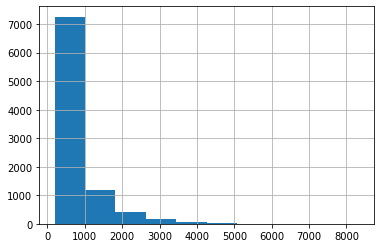

In [13]:
ClaimsAmount['Claim Amount'].hist()

In [14]:
ClaimsAmount['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [15]:
ClaimsAmount['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [16]:
ClaimsAmount['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [17]:
ClaimsAmount['Effective To Date'].value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
1/28/11    169
2/26/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/28/11    161
2/10/11    161
1/21/11    160
1/2/11     160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
1/18/11    154
2/1/11     154
1/15/11    153
1/14/11    152
1/7/11     151
2/11/11    151
1/25/11    151
2/2/11     149
1/8/11     149
2/18/11    149
2/25/11    149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/13/11    145
1/30/11    145
2/6/11     144
2/23/11    143
1/6/11     143
1/16/11    142
2/24/11    139
2/16/11    139
2/13/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: Effective To Date, dtype: int64

In [18]:
ClaimsAmount['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [19]:
ClaimsAmount['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [20]:
ClaimsAmount['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [21]:
ClaimsAmount['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [22]:
ClaimsAmount['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [23]:
ClaimsAmount['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [24]:
ClaimsAmount['Claim Reason'].value_counts()

Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim Reason, dtype: int64

In [25]:
ClaimsAmount['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [26]:
ClaimsAmount['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [27]:
ClaimsAmount['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

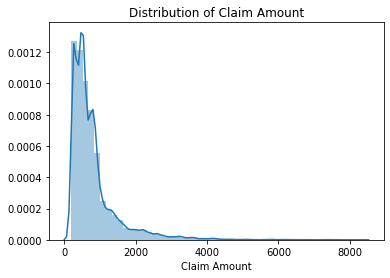

In [28]:
sns.distplot(ClaimsAmount["Claim Amount"])
plt.title("Distribution of Claim Amount")
plt.show()

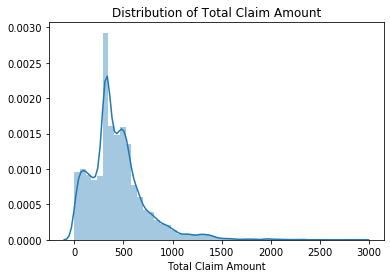

In [29]:
sns.distplot(ClaimsAmount["Total Claim Amount"])
plt.title("Distribution of Total Claim Amount")
plt.show()


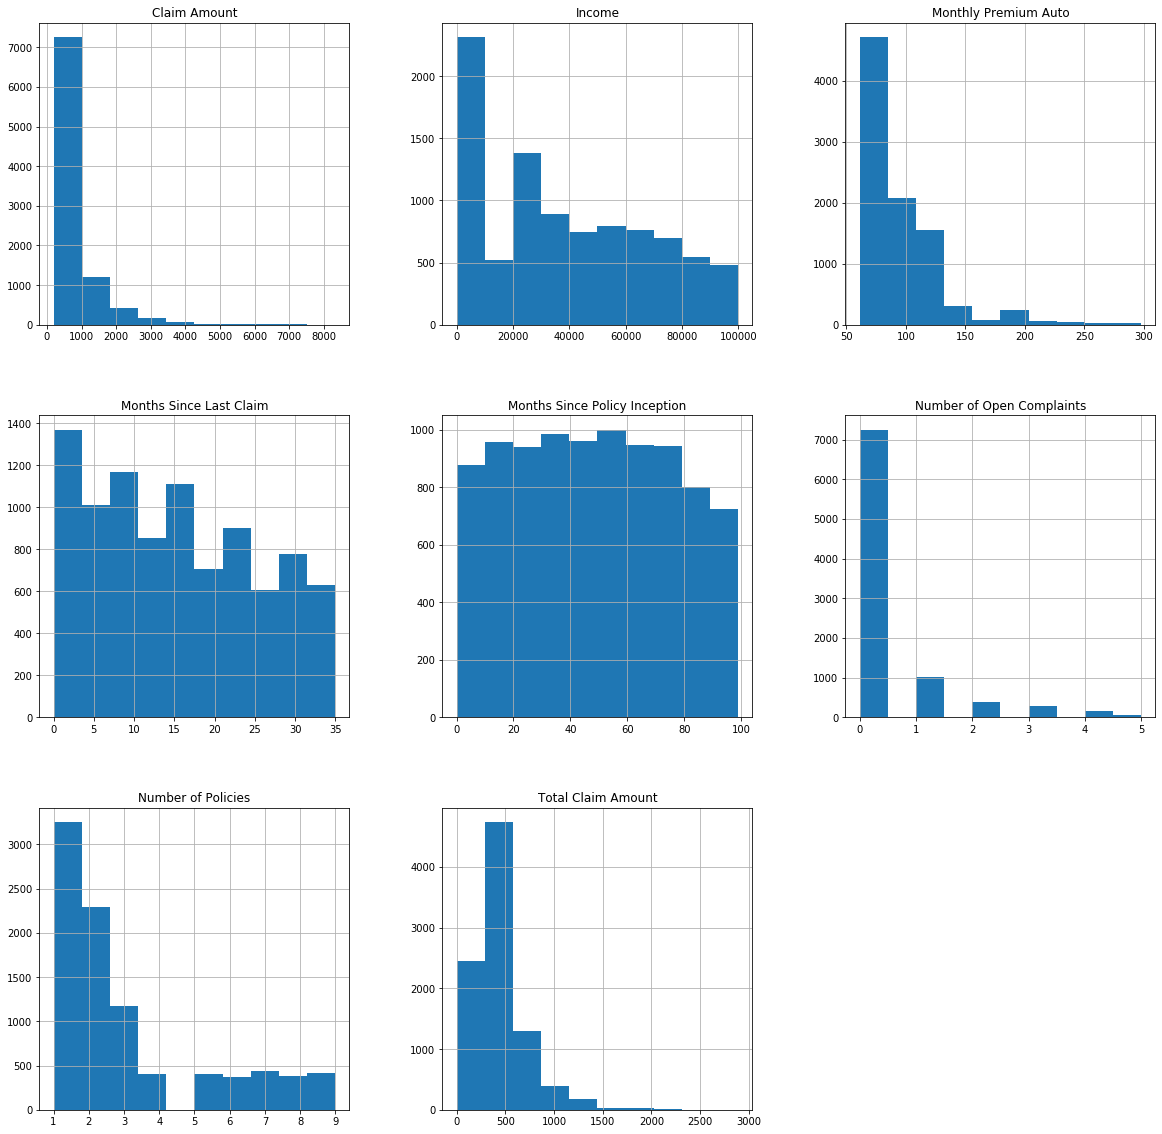

In [30]:
ClaimsAmount.hist(figsize=(20,20))
plt.show()

In [31]:
ClaimsAmount.columns.to_series().groupby(ClaimsAmount.dtypes).groups

{dtype('int64'): Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies'],
       dtype='object'),
 dtype('float64'): Index(['Claim Amount', 'Total Claim Amount'], dtype='object'),
 dtype('O'): Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
        'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type', 'Policy',
        'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
       dtype='object')}

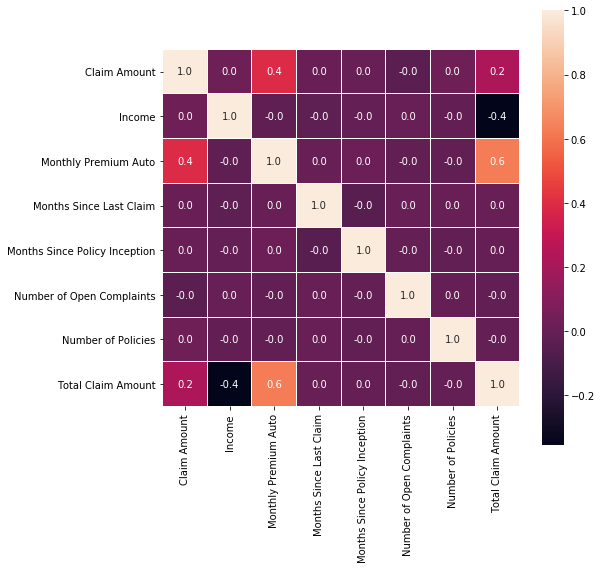

In [32]:
#Check Out Correlation
f,ax = plt.subplots(figsize = (8, 8))
sns.heatmap(ClaimsAmount.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)

In [33]:
ClaimsAmount

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [34]:
# one hot encoding
columns_names=['Customer','Effective To Date',"Education","EmploymentStatus", "Gender", "Marital Status", "Policy Type",
              "State Code","State", "Country", "Coverage", "Location Code"]
ClaimsAmount_new = pd.get_dummies(ClaimsAmount.drop(columns_names, axis = 1))

print(ClaimsAmount_new.shape)

(9134, 36)


In [35]:
y = ClaimsAmount_new['Claim Amount']
x = ClaimsAmount_new.drop('Claim Amount', axis = 1)
print(x.shape)
print(y.shape)

(9134, 35)
(9134,)


In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
       # print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [38]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 96 is 0.1913346843250232


In [39]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 25}

In [40]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=25)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 67 is 0.17577763961190795


In [41]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  0.15358565287894493
Standard deviation in r2 score for Linear Regression :  0.019819495626086966


 Mean r2 score for KNN Regression :  0.11763354560016322
Standard deviation in r2 score for KNN Regression :  0.018089483527106928


In [42]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [43]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 96 is 0.1925654971243399


In [44]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,x,y,scoring='r2').std())

Mean r2 score for lasso regression :  0.15541397646477034
standard deviation for lasso ragression :  0.02029409915115708


In [45]:
#now we will try to use gradient boosting technique
#for getting best set of parameter we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [46]:
#now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print('Mean r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for gradient boosting Regrssion :  0.6790976995579544
Standard Deviation r2 score for gradient boosting Regrssion :  0.01517278758862101


In [48]:
# we tried all the model and till now linear regression is the best
#random state corresponding to highest r2_score is 96
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,test_size=0.20)
lreg=LinearRegression()        
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [49]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  605.117718070563
r2_score is :  0.1913346843250232


In [50]:
from sklearn.externals import joblib
joblib.dump(lreg,'ClaimAmount_model.obj')

['ClaimAmount_model.obj']

In [51]:
model=joblib.load('ClaimAmount_model.obj')

In [52]:
result=pd.DataFrame(model.predict(x_test))

In [54]:
result.to_csv('ClaimAmountsprdictresults.csv')